# Multi-class Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from display_data import *
from sigmoid import *
from cross_entropy_loss_reg import *
from one_vs_all import *

In [2]:
data = loadmat('ex3data1.mat')
X = data['X']
# Subtract one to avoid confusions with indexing
y = data['y'] - 1

input_layer_size = 400
labels = 10
# Randomly select 100 training examples
random_indices = np.random.randint(0, X.shape[0], size=100)
vis_data = X[random_indices, :]

(<matplotlib.image.AxesImage at 0x2261d703b88>,
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        ...,
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1.,  0.,  0., ...,  0.,  0., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]))

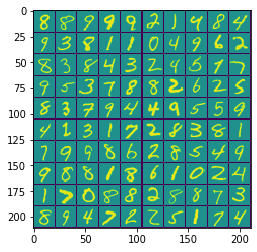

In [3]:
display_data(vis_data)

In [4]:
theta_test = np.array([-2, -1, 1, 2])
a = np.array(range(1,16))
a = a / 10
a = np.reshape(a, (5, 3))
X_test = np.concatenate((np.ones((5, 1)), a), axis=-1)
y_test = (np.array([1, 0, 1, 0, 1]) >= 0.5).reshape((5,1))
print(y_test.shape)
lambda_test = 3
cross_entropy_loss_reg(theta_test, X_test, y_test.astype(np.int), lambda_test)
cross_entropy_gradient_reg(theta_test, X_test, y_test.astype(np.int), lambda_test)

(5, 1)


array([-0.60628251, -0.61554657,  0.52382518,  1.06319693])

In [5]:
big_theta = one_vs_all(X, y, reg_lambda=0.1, K=labels)

array([[-1.08092873e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.91670106e-04,  2.99540595e-04,  0.00000000e+00],
       [-1.71137535e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.24021366e-02, -4.59374995e-03,  0.00000000e+00],
       [-2.17751514e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.57895805e-03, -6.97320738e-04,  0.00000000e+00],
       ...,
       [-2.11894270e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.00277632e-03,  4.85960901e-04,  0.00000000e+00],
       [-2.13215641e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -7.29632302e-03,  4.18979500e-04,  0.00000000e+00],
       [-1.10692566e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.18123408e-02,  6.97616386e-04,  0.00000000e+00]])

In [ ]:
p = np.zeros()